<a href="https://colab.research.google.com/github/Ponolia/data-analyst-portfolio/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고객 이탈 예측 분석

## 문제 정의
고객 행동 데이터 기반으로
이탈 가능 고객을 조기에 식별하여
CRM 대응 전략 수립에 활용

## 분석 목표
- 이탈 가능 고객 예측
- 핵심 사용자 행동 지표 도출
- 실무 적용 가능한 타겟 기준 제안

## 1. 데이터 로드 및 기본 확인

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/ZBproject/data/BankChurners_.csv'
df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [37]:
df.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0                  39  ...                      3       12691.0   
1                  44  ...                      2        8256.0   
2                  36  ...                      0        3418.0   
3                  34  ...                      1        3313.0   
4                  21  ...                      0        4716.0   
...               ...  ...                    ...           ...   
10122              40  ...                      3        4003.0   
10123              25  ...                      3        4277.0   
10124              36  ...                      4        5409.0   
10125              36  ...                      3        5281.0   
10126              25  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8764              69                0.683   
1

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

## 2. EDA (Exploratory Data Analysis)

본 분석에서는
이탈 여부에 따른 **행동 지표 차이**에 집중함

### 2-1. 이탈 고객 비율 확인


In [18]:
df['Attrition_Flag'].value_counts()
df['Attrition_Flag'].value_counts(normalize=True)

,proportion
Attrition_Flag,
Existing Customer,0.83934
Attrited Customer,0.16066


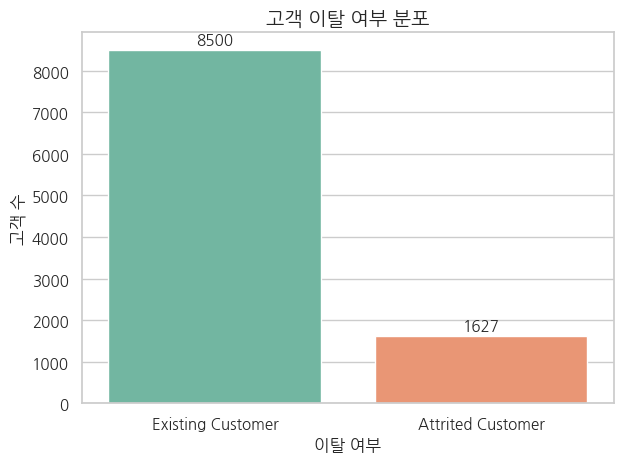

In [19]:
# 고객이탈
ax = sns.countplot(
     x='Attrition_Flag',
    hue='Attrition_Flag',
    data=df,
    palette='Set2',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=2)


plt.title('고객 이탈 여부 분포', fontsize=14)
plt.xlabel('이탈 여부')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

### 2-2. 이탈 여부별 핵심 행동 지표 비교


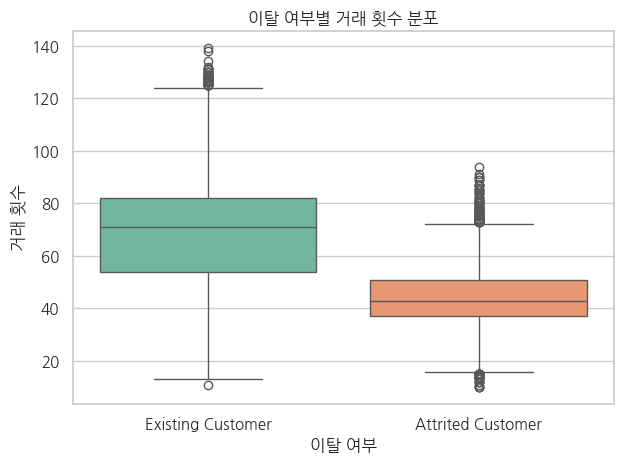

In [20]:
sns.boxplot(
    x='Attrition_Flag',
    y='Total_Trans_Ct',
    hue='Attrition_Flag',
    data=df,
    palette='Set2'
)
plt.title('이탈 여부별 거래 횟수 분포')
plt.xlabel('이탈 여부')
plt.ylabel('거래 횟수')
plt.tight_layout()
plt.show()


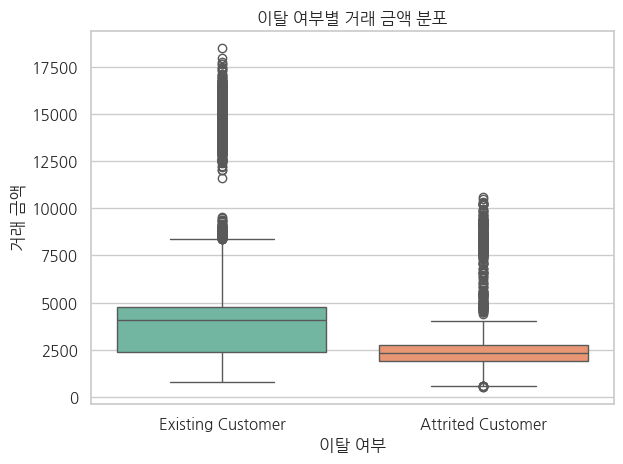

In [21]:
sns.boxplot(
    x='Attrition_Flag',
    y='Total_Trans_Amt',
    hue='Attrition_Flag',
    data=df,
    palette='Set2'
)
plt.title('이탈 여부별 거래 금액 분포')
plt.xlabel('이탈 여부')
plt.ylabel('거래 금액')
plt.tight_layout()
plt.show()


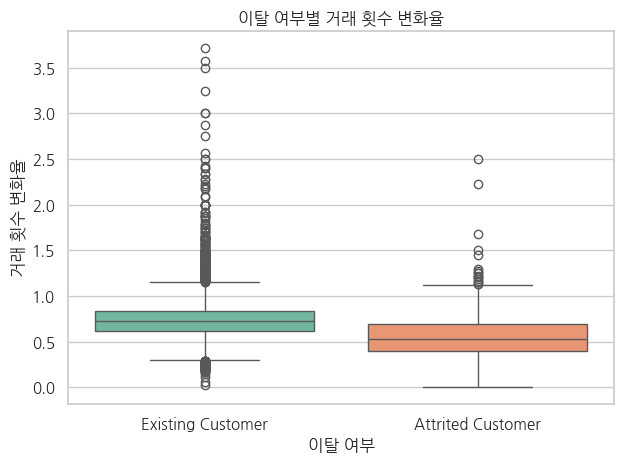

In [22]:
sns.boxplot(
    x='Attrition_Flag',
    y='Total_Ct_Chng_Q4_Q1',
    hue='Attrition_Flag',
    data=df,
    palette='Set2'
)
plt.title('이탈 여부별 거래 횟수 변화율')
plt.xlabel('이탈 여부')
plt.ylabel('거래 횟수 변화율')
plt.tight_layout()
plt.show()


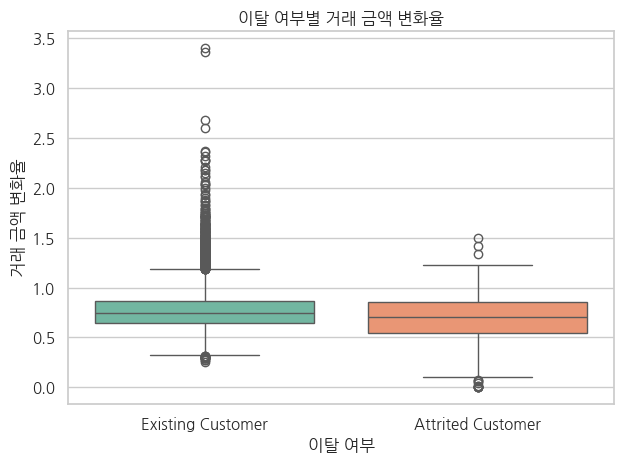

In [14]:
sns.boxplot(
    x='Attrition_Flag',
    y='Total_Amt_Chng_Q4_Q1',
    hue='Attrition_Flag',
    data=df,
    palette='Set2'
)
plt.title('이탈 여부별 거래 금액 변화율')
plt.xlabel('이탈 여부')
plt.ylabel('거래 금액 변화율')
plt.tight_layout()
plt.show()


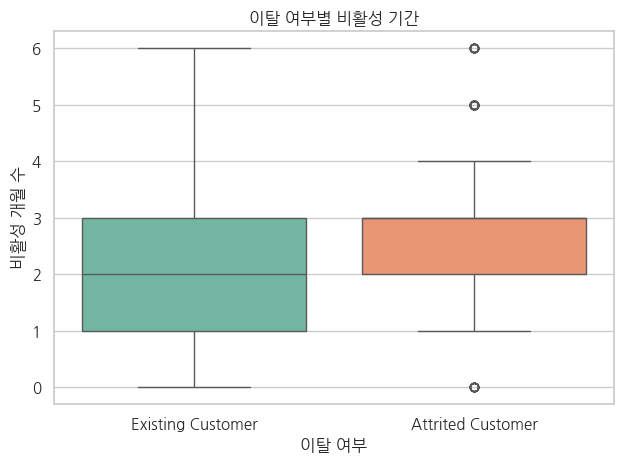

In [15]:
sns.boxplot(
    x='Attrition_Flag',
    y='Months_Inactive_12_mon',
    hue='Attrition_Flag',
    data=df,
    palette='Set2'
)
plt.title('이탈 여부별 비활성 기간')
plt.xlabel('이탈 여부')
plt.ylabel('비활성 개월 수')
plt.tight_layout()
plt.show()


### 2-3. EDA 요약

- 이탈 고객은 거래 횟수와 거래 금액이 전반적으로 낮음
- 최근 거래 감소율이 클수록 이탈 가능성이 높아짐
- 비활성 기간 증가가 이탈과 강하게 연관됨


## 3. 머신러닝 모델링
EDA 결과를 바탕으로,
이탈과 직접적으로 연관된 행동 지표를 활용해
예측 모델을 구축함


### 3-1. 데이터 분리 및 기준선 모델 (Logistic Regression)

위 EDA 결과를 바탕으로,
이탈과 직접적으로 연관된 행동 지표를 중심으로
머신러닝 모델을 구축함


In [25]:
features = [
    'Total_Trans_Ct',
    'Total_Trans_Amt',
    'Total_Ct_Chng_Q4_Q1',
    'Total_Amt_Chng_Q4_Q1',
    'Months_Inactive_12_mon'
]
X = df[features]

In [24]:
y = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

logit.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [28]:
from sklearn.metrics import classification_report

y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1701
           1       0.64      0.35      0.45       325

    accuracy                           0.86      2026
   macro avg       0.76      0.66      0.69      2026
weighted avg       0.85      0.86      0.85      2026



### 3-2. XGBoost 모델 학습


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
from sklearn.metrics import confusion_matrix, recall_score

y_pred_xgb = xgb.predict(X_test)

print("Recall:", recall_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Recall: 0.7661538461538462
Confusion Matrix:
 [[1668   33]
 [  76  249]]


### 3-3. 모델 성능 개선
- Threshold 조정
- 클래스 가중치(scale_pos_weight) 적용


In [32]:
from sklearn.metrics import recall_score, precision_score

y_proba = xgb.predict_proba(X_test)[:, 1]

for t in [0.5, 0.45, 0.4, 0.35, 0.3]:
    y_pred_t = (y_proba >= t).astype(int)
    recall = recall_score(y_test, y_pred_t)
    precision = precision_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Recall={recall:.3f} | Precision={precision:.3f}")


Threshold=0.50 | Recall=0.766 | Precision=0.883
Threshold=0.45 | Recall=0.788 | Precision=0.868
Threshold=0.40 | Recall=0.812 | Precision=0.852
Threshold=0.35 | Recall=0.846 | Precision=0.828
Threshold=0.30 | Recall=0.874 | Precision=0.805


In [33]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("scale_pos_weight:", scale_pos_weight)

from xgboost import XGBClassifier

xgb_weighted = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

xgb_weighted.fit(X_train, y_train)


scale_pos_weight: 5.221966205837173


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
y_pred_weighted = xgb_weighted.predict(X_test)

from sklearn.metrics import recall_score, confusion_matrix
print("Recall (weighted):", recall_score(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))


Recall (weighted): 0.9230769230769231
Confusion Matrix:
 [[1600  101]
 [  25  300]]


## 4. Feature Importance 분석


/tmp/ipython-input-2162995846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


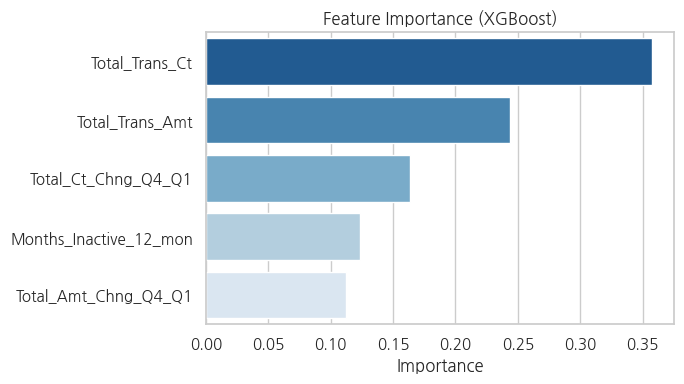

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.Series(
    xgb.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(
    x=importance.values,
    y=importance.index,
    palette='Blues_r'
)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 6. 기대 효과 및 실무 활용 방안

- 이탈 고객의 약 92%를 사전에 식별
- 고위험 고객 중심 CRM 운영 가능
- 마케팅 비용 효율화 및 이탈률 감소 기대

## 7. 최종 모델 선정 및 운영 전략

기본 XGBoost 모델을 기준선으로 설정한 후,

Threshold 조정과 클래스 가중치 적용을 통해

이탈 고객 탐지 성능을 단계적으로 개선하였다.

특히 클래스 가중치를 적용한 XGBoost 모델은

이탈 고객 Recall 92%를 달성하여,

이탈 고객을 거의 놓치지 않는 성능을 보였다.

본 분석에서는

이탈 최소화를 최우선 목표로 설정하여,

Weighted XGBoost 모델을 최종 모델로 선정하였다.

## 8. 이탈 위험 고객 타겟 기준 정의

### 1차 타겟 기준 (모델 기반)

Weighted XGBoost 모델의 예측 확률이

0.35 이상인 고객을

1차 이탈 위험 고객으로 정의함

① Total_Trans_Ct           : 하위 25% 이하

② Total_Trans_Amt          : 하위 25% 이하

③ Total_Ct_Chng_Q4_Q1      : 하위 25% 이하

④ Total_Amt_Chng_Q4_Q1     : 하위 25% 이하

⑤ Months_Inactive_12_mon   : 3개월 이상

** Level 1: high Risk **
- 이탈 확률 ≥ 0.35
AND
- 행동 지표 조건 2개 이상 충족

** Leve 2: Medium Risk **
- 이탈 확률 0.25 ~ 0.35
AND
- 행동 지표 조건 2개 이상 충족

** Leve 3: Low Risk **
- 이탈 확률 < 0.25

In [ ]:
# SQL
"""
 CASE
  WHEN churn_proba >= 0.35
       AND (
         trans_ct_pct <= 0.25 +
         trans_amt_pct <= 0.25 +
         ct_chg_pct <= 0.25 +
         amt_chg_pct <= 0.25 +
         inactive_months >= 3
       ) >= 2
  THEN 'High Risk'

  WHEN churn_proba BETWEEN 0.25 AND 0.35
       AND (
         trans_ct_pct <= 0.25 +
         trans_amt_pct <= 0.25 +
         ct_chg_pct <= 0.25 +
         amt_chg_pct <= 0.25 +
         inactive_months >= 3
       ) >= 2
  THEN 'Medium Risk'

  ELSE 'Low Risk'
END ;
"""

## 기대 효과 (요약)
본 기준을 적용할 경우,
- 이탈 고객의 약 92%를 사전에 식별할 수 있으며,
- 불필요한 전사 캠페인을 줄이고
- 고위험 고객 중심의 효율적인 CRM 운영이 가능함